In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
data = {-1:np.array([[1,7],[2,8],[3,8]]), 1:np.array([[5,1],[6,-1],[7,3]])}

In [4]:
class SVM:
    def __init__(self, visualize=True):
        self.visualize = visualize
        self.colors = {-1:'r', 1:'b'}
        if visualize:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def fit(self, data):
        self.data = data
        new_data = {}
        transform_val = [[1,1],[1,-1],[-1,1],[-1,-1]]
        transformed_data = []
        for grp in self.data:
            for coordinates in self.data[grp]:
                for val in coordinates:
                    transformed_data.append(val)
        
        self.max_feature_val = max(transformed_data)
        self.min_feature_val = min(transformed_data)
        transformed_data = None
        step_sizes = [self.max_feature_val * 0.1, self.max_feature_val * 0.01, self.max_feature_val * 0.001]
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_val * 10 # start point
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False # for convex problem to check when moved ahead of optimized loc
            while not optimized:
                for b in np.arange(-1*(self.max_feature_val * b_range_multiple),
                                  self.max_feature_val * b_range_multiple, step * b_multiple):
                    for t in transform_val:
                        w_t = w * t
                        found = True
                        for grp in self.data:
                            for coordinates in self.data[grp]:
                                if not grp*(np.dot(w_t, coordinates) + b) >= 1: # yi = (xi.w) + b
                                    found = False
                        if found:
                            new_data[np.linalg.norm(w_t)] = [w_t, b]
            
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step!')
                else:
                    w = w - step
            
            norms = sorted([n for n in new_data])
            opt_choice = new_data[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
    
    def predict(self, features):
        # sign(x.w + b)
        classify = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classify != 0 and self.visualize:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classify])
        return classify
    
    def visualization(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data[i]] for i in data]
        
        # hyperplane => x.w+b
        
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_val*0.9, self.max_feature_val*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1 -> positive SV hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2])
        
        # (w.x+b) = -1 -> negative SV hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2])
        
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2])
        
        plt.show()
        

Optimized a step!
Optimized a step!
Optimized a step!
[0, 10] : -1.0
[1, 3] : -1.0
[3, 4] : -1.0
[3, 5] : -1.0
[4, 5] : -1.0
[5, 5] : 1.0
[5, 6] : -1.0
[6, -5] : 1.0
[5, 8] : -1.0


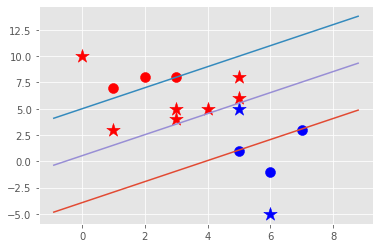

In [5]:
svm = SVM(visualize=True)
svm.fit(data=data)

predictions = [[0,10],
               [1,3],
               [3,4],
               [3,5],
               [4,5],
               [5,5],
               [5,6],
               [6,-5],
               [5,8]]

for p in predictions:
    print(p, ':', svm.predict(p))

svm.visualization()